In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

root_path = Path("../")
data_path = root_path / "data"
figures_path = Path("figures")

In [2]:
def prepare_dataset(dataset: pd.DataFrame) -> pd.DataFrame:
    dataset = dataset[dataset.User_Score != "tbd"]
    dataset["User_Score"] = dataset["User_Score"].astype("float")
    dataset.columns = [col.lower() for col in dataset.columns]
    return dataset

In [3]:
dataset_path = data_path / "dataset.csv"
df = pd.read_csv(dataset_path)
df = prepare_dataset(df)

/var/folders/jq/byk1x73j6pngqgl6my8tgyhm0000gn/T/ipykernel_13110/468860359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["User_Score"] = dataset["User_Score"].astype("float")


In [8]:
df.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
publisher           object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
global_sales       float64
critic_score       float64
critic_count       float64
user_score         float64
user_count         float64
developer           object
rating              object
dtype: object

In [10]:
col1, col2 = "user_score", "critic_score"

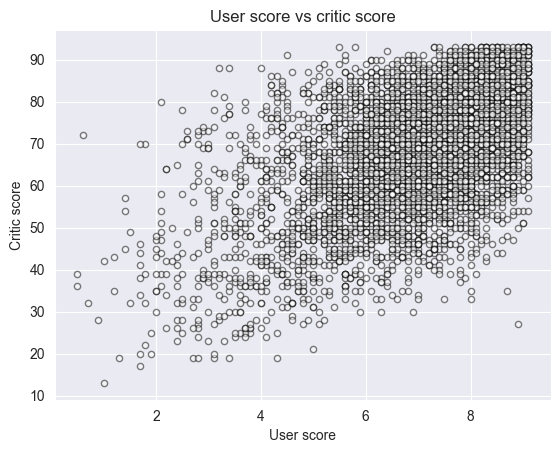

In [11]:
def prepare_label(label: str) -> str:
    return label.replace("_", " ").capitalize()


data = df.query(
    f"`{col1}` < `{col1}`.quantile(0.99) and `{col2}` < `{col2}`.quantile(0.99)"
)

data.plot(
    x=col1,
    y=col2,
    kind="scatter",
    color="white",
    edgecolor="k",
    alpha=0.5,
    **{
        "xlabel": prepare_label(col1),
        "ylabel": prepare_label(col2),
        "title": prepare_label(f"{col1} vs {col2}"),
    },
);

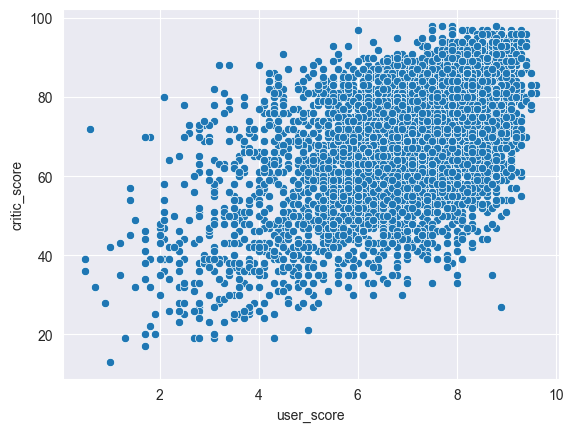

In [12]:
sns.scatterplot(
    data=df,
    x=col1,
    y=col2,
)
plt.savefig(figures_path / "scatter_seaborn.png", dpi=200, bbox_inches="tight")

In [13]:
df['critic_score'] = df['critic_score'] / df.critic_score.max()
df['user_score'] = df['user_score'] / df.user_score.max()


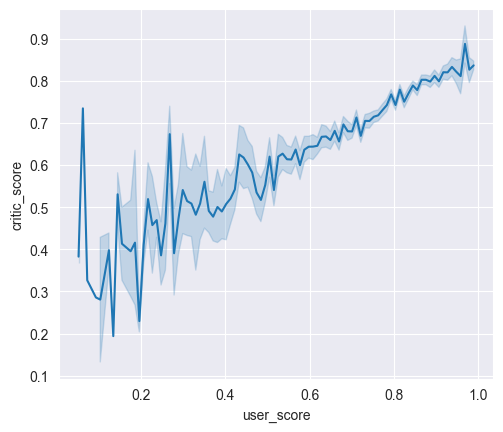

In [14]:
ax = sns.lineplot(
    data=df,
    x=col1,
    y=col2,
)
ax.set_aspect("equal")

plt.savefig(figures_path / "line_seaborn.png", dpi=200, bbox_inches="tight")

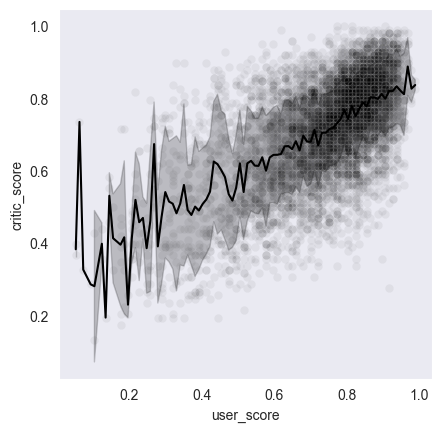

In [15]:
sns.lineplot(
    data=df,
    x=col1,
    y=col2,
    errorbar="sd",
    color="black",
    zorder=1,
)
ax = sns.scatterplot(
    data=df,
    x=col1,
    y=col2,
    color="black",
    alpha=0.05,
    zorder=-1,
)
ax.set_aspect("equal")
ax.grid(False)

plt.savefig(figures_path / "line_and_scatter_seaborn.png", dpi=200, bbox_inches="tight")

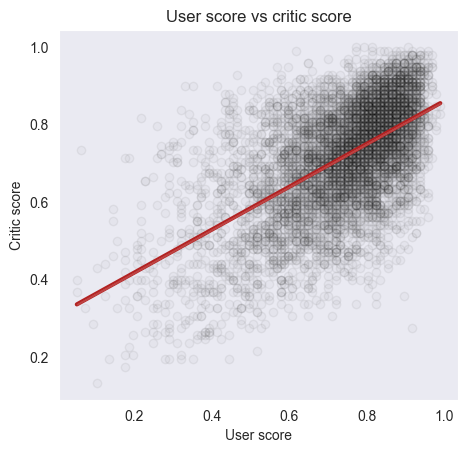

In [16]:
ax = sns.regplot(
    data=df,
    x=col1,
    y=col2,
    ci=0.99,
    scatter_kws={"alpha": 0.05, "zorder": 1, "color": "gray", "edgecolor": "k"},
    line_kws={"zorder": 1, "color": "firebrick", "lw": 3},
)
ax.grid(False)
ax.set_aspect("equal")
ax.set_xlabel(prepare_label(col1))
ax.set_ylabel(prepare_label(col2))
ax.set_title(prepare_label(f"{col1} vs {col2}"))


plt.savefig(figures_path / "regplot_seaborn.png", dpi=200, bbox_inches="tight")

In [17]:
x = np.linspace(0, 1, 200)
y = np.cos(x * 50) * np.exp(-2 * x) + np.random.randn(len(x)) / 5
df_sample = pd.DataFrame({"x": x, "y": y})

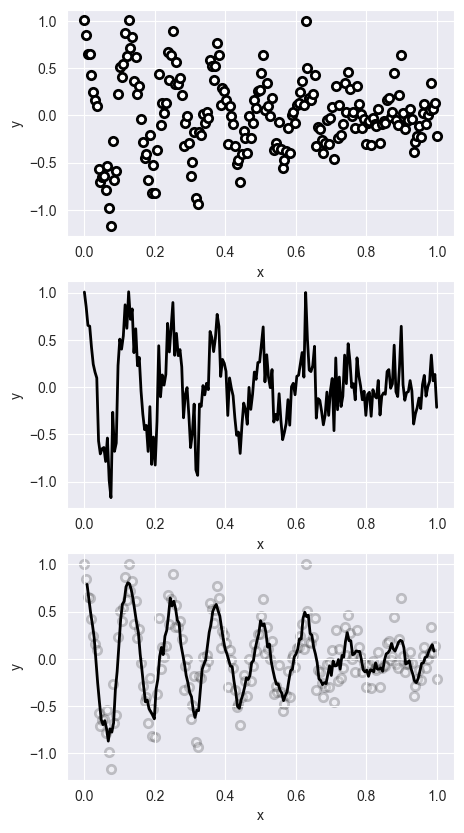

In [18]:
fig, (ax_top, ax_bottom, ax) = plt.subplots(3, 1, figsize=(5, 10))

scatter_kwg = {"color": "white", "edgecolor": "k", "lw": 2}
line_kwg = {"color": "k", "lw": 2}

sns.scatterplot(data=df_sample, x="x", y="y", ax=ax_top, **scatter_kwg)
sns.lineplot(data=df_sample, x="x", y="y", ax=ax_bottom, **line_kwg)

sns.scatterplot(data=df_sample, x="x", y="y", ax=ax, **scatter_kwg, zorder=0, alpha=0.2)
sns.lineplot(
    data=df_sample.rolling(window=4).mean(), x="x", y="y", ax=ax, **line_kwg, zorder=1
)

plt.savefig(figures_path / "scatter_avoid_sample.png", dpi=200, bbox_inches="tight")

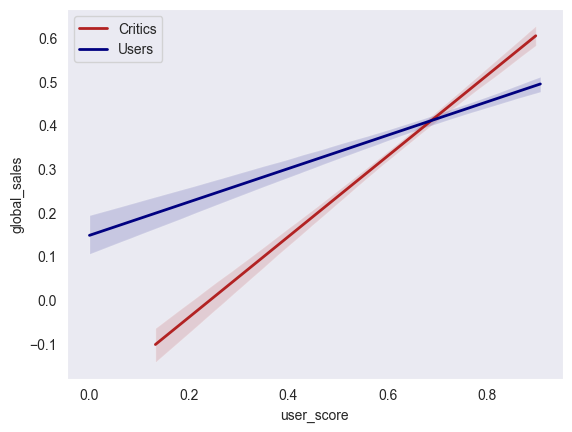

In [19]:
col1 = 'critic_score'
col2 = "global_sales"

scatter_kws = {"color": "white", "edgecolor": "firebrick", "alpha": 0.05, "s": 10}
line_kws = {"color": "firebrick", "lw": 2}

data = df.query(
    f"`{col1}` < `{col1}`.quantile(0.95) and `{col2}` < `{col2}`.quantile(0.95)"
)

ax = sns.regplot(
    data=data,
    x=col1,
    y=col2,
    scatter=False,
    scatter_kws=scatter_kws,
    line_kws=line_kws, label='Critics'
)
# sns.kdeplot(data=data, x=col1, y=col2, ax=ax, color='firebrick', alpha=0.5, levels=4)


col1 = "user_score"

scatter_kws = {"color": "white", "edgecolor": "navy", "alpha": 0.05, "s": 10}
line_kws = {"color": "navy", "lw": 2}

data = df.query(
    f"`{col1}` < `{col1}`.quantile(0.95) and `{col2}` < `{col2}`.quantile(0.95)"
)

sns.regplot(
    data=data,
    x=col1,
    y=col2,
    scatter=False,
    scatter_kws=scatter_kws,
    line_kws=line_kws,
    ax=ax,
    label='Users'
)
# sns.kdeplot(data=data, x=col1, y=col2, ax=ax, color='navy', alpha=0.5, levels=4)


ax.grid(False)
ax.legend()

plt.savefig(figures_path / f"critics_vs_users_regplot.png", dpi=200, bbox_inches="tight")


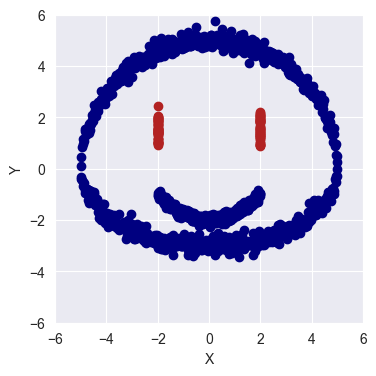

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Creating the x values for the points
x = np.linspace(-5, 5, 400)

# Creating the y values for the points forming the top of the smile
y_top = np.sqrt(25 - x**2)

# Creating the y values for the points forming the bottom of the smile
y_bottom = -3*np.sqrt(1-(x/5)**2)

# Creating the x and y values for the points forming the left eye
x_eye_left = -2 + np.zeros(50)
y_eye_left = np.linspace(1,2,50)

# Creating the x and y values for the points forming the right eye
x_eye_right = 2 + np.zeros(50)
y_eye_right = np.linspace(1,2,50)

plt.figure(figsize=(4,4))

np.random.seed(42)
plt.scatter(x, y_top + np.random.normal(size=len(y_top)) / 5, c='navy')
plt.scatter(x, y_bottom + np.random.normal(size=len(y_bottom)) / 5, c='navy')
plt.scatter(x_eye_left, y_eye_left + np.random.normal(size=len(y_eye_left)) / 5, c='firebrick')
plt.scatter(x_eye_right, y_eye_right + np.random.normal(size=len(y_eye_right)) / 5, c='firebrick')

x = np.linspace(-2, 2, 400)
y = (x/2)**2 - 2
plt.scatter(x, (x/2)**2 - 2 + np.random.normal(size=len(y)) / 10, color='navy')

plt.xlabel("X")
plt.ylabel("Y")

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.gca().set_aspect('equal', adjustable='box')

plt.savefig(figures_path / f"smiley_scatter.png", dpi=200, bbox_inches="tight")

plt.show()